In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('amazon_reviews.csv')

In [3]:
df.head(5)

,Reviews,label
0,This product so far has not disappointed. My c...,spam
1,great for beginner or experienced person. Boug...,spam
2,Inexpensive tablet for him to use and learn on...,spam
3,I've had my Fire HD 8 two weeks now and I love...,ham
4,I bought this for my grand daughter when she c...,ham


In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy


In [5]:
df.shape

(5002, 2)

### 1. Data Cleaning Process

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  5002 non-null   object
 1   label    5002 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [7]:
df.rename(columns={'Reviews' : 'text','label' : 'target'}, inplace = True)
df.head()

,text,target
0,This product so far has not disappointed. My c...,spam
1,great for beginner or experienced person. Boug...,spam
2,Inexpensive tablet for him to use and learn on...,spam
3,I've had my Fire HD 8 two weeks now and I love...,ham
4,I bought this for my grand daughter when she c...,ham


In [8]:
from sklearn.preprocessing import LabelEncoder
#initialize the label encoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,text,target
0,This product so far has not disappointed. My c...,1
1,great for beginner or experienced person. Boug...,1
2,Inexpensive tablet for him to use and learn on...,1
3,I've had my Fire HD 8 two weeks now and I love...,0
4,I bought this for my grand daughter when she c...,0


In [11]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [12]:
df.shape


(5002, 2)

### 2.EDA

In [13]:
df.head()

,text,target
0,This product so far has not disappointed. My c...,1
1,great for beginner or experienced person. Boug...,1
2,Inexpensive tablet for him to use and learn on...,1
3,I've had my Fire HD 8 two weeks now and I love...,0
4,I bought this for my grand daughter when she c...,0


In [14]:
df['target'].value_counts()

0    3356
1    1646
Name: target, dtype: int64

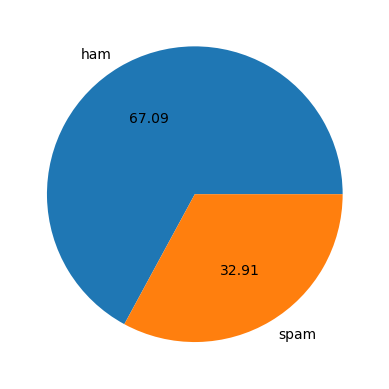

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [16]:
import nltk

In [17]:
df['num_characters'] = df['text'].apply(len)

In [18]:
df.head()

,text,target,num_characters
0,This product so far has not disappointed. My c...,1,143
1,great for beginner or experienced person. Boug...,1,75
2,Inexpensive tablet for him to use and learn on...,1,131
3,I've had my Fire HD 8 two weeks now and I love...,0,593
4,I bought this for my grand daughter when she c...,0,613


In [19]:
#num of words
import nltk
nltk.download('punkt')
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshmanishpatidar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
df.head()

,text,target,num_characters,num_words
0,This product so far has not disappointed. My c...,1,143,29
1,great for beginner or experienced person. Boug...,1,75,15
2,Inexpensive tablet for him to use and learn on...,1,131,30
3,I've had my Fire HD 8 two weeks now and I love...,0,593,123
4,I bought this for my grand daughter when she c...,0,613,124


In [21]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,This product so far has not disappointed. My c...,1,143,29,2
1,great for beginner or experienced person. Boug...,1,75,15,2
2,Inexpensive tablet for him to use and learn on...,1,131,30,2
3,I've had my Fire HD 8 two weeks now and I love...,0,593,123,4
4,I bought this for my grand daughter when she c...,0,613,124,6


In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5002.000000,5002.000000,5002.000000
mean,155.695922,33.774290,2.593363
std,223.035321,47.301689,2.509446
min,3.000000,1.000000,1.000000
25%,66.000000,14.000000,1.000000
50%,99.000000,22.000000,2.000000
75%,175.000000,38.000000,3.000000
max,8351.000000,1775.000000,96.000000


In [24]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5002.000000,5002.000000,5002.000000,5002.000000
mean,0.329068,155.695922,33.774290,2.593363
std,0.469922,223.035321,47.301689,2.509446
min,0.000000,3.000000,1.000000,1.000000
25%,0.000000,66.000000,14.000000,1.000000
50%,0.000000,99.000000,22.000000,2.000000
75%,1.000000,175.000000,38.000000,3.000000
max,1.000000,8351.000000,1775.000000,96.000000


In [25]:
df.max()

text              İt is cheap tablet option coming from amazon. ...
target                                                            1
num_characters                                                 8351
num_words                                                      1775
num_sentences                                                    96
dtype: object

In [26]:
#ham
df[df['target'] == 0].describe()

,target,num_characters,num_words,num_sentences
count,3356.0,3356.000000,3356.000000,3356.000000
mean,0.0,153.507151,32.880215,2.552145
std,0.0,243.321469,51.243610,2.750633
min,0.0,3.000000,1.000000,1.000000
25%,0.0,65.000000,14.000000,1.000000
50%,0.0,93.000000,20.000000,2.000000
75%,0.0,163.000000,35.000000,3.000000
max,0.0,8351.000000,1775.000000,96.000000


In [27]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3356.000000,3356.000000,3356.000000
mean,153.507151,32.880215,2.552145
std,243.321469,51.243610,2.750633
min,3.000000,1.000000,1.000000
25%,65.000000,14.000000,1.000000
50%,93.000000,20.000000,2.000000
75%,163.000000,35.000000,3.000000
max,8351.000000,1775.000000,96.000000


In [28]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1646.000000,1646.000000,1646.00000
mean,160.158566,35.597205,2.67740
std,174.500157,37.968263,1.92436
min,8.000000,2.000000,1.00000
25%,70.250000,16.000000,1.00000
50%,113.000000,26.000000,2.00000
75%,199.750000,43.000000,3.00000
max,3634.000000,808.000000,34.00000


In [29]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

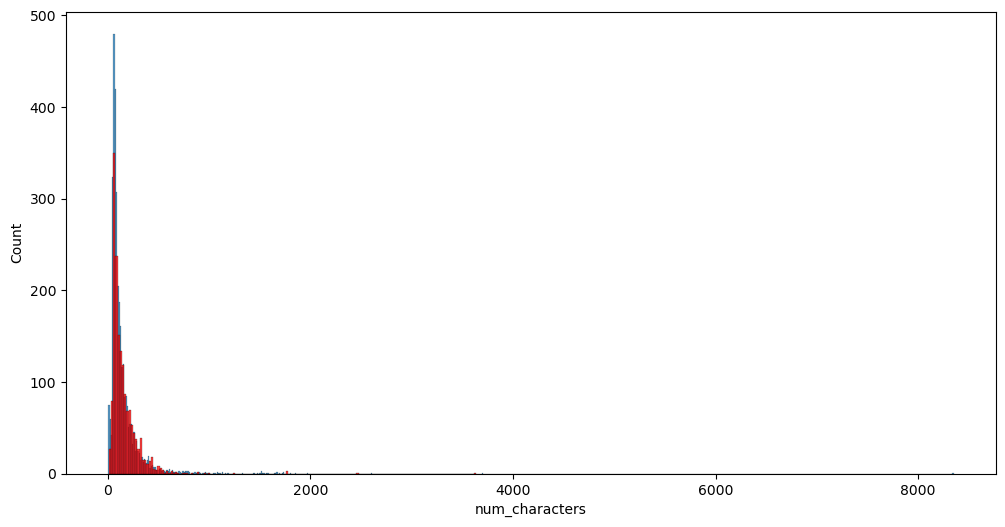

In [30]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

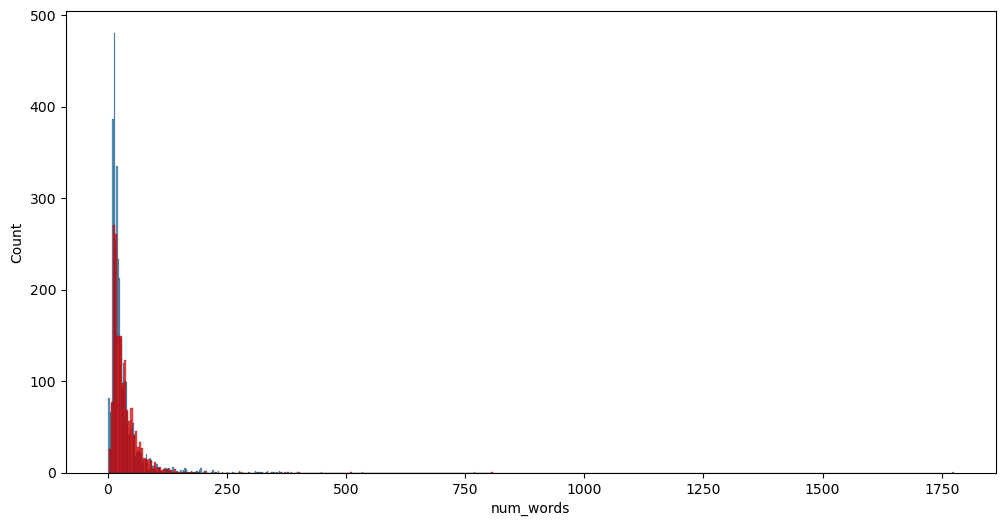

In [31]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

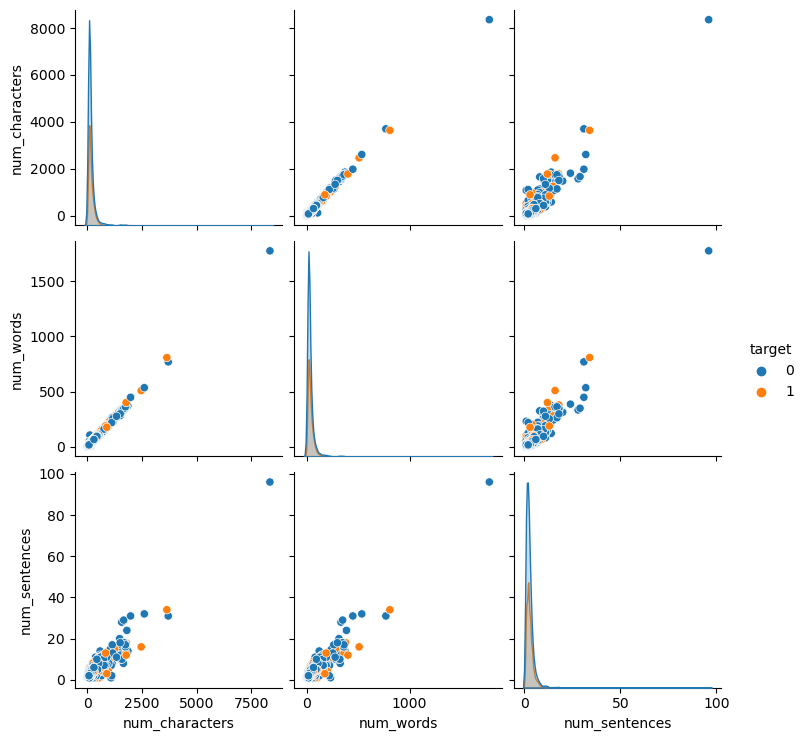

In [32]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

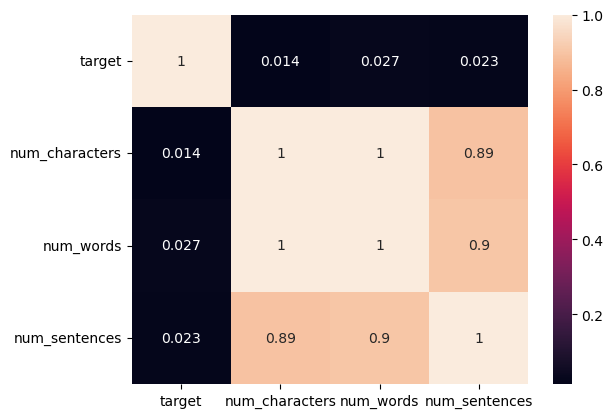

In [33]:
sns.heatmap(df.corr(),annot = True)

### 3. Data Preprocessing

##### Lower case
##### Tokenization
##### Removing special characters
##### Removing stop words and punctuation
##### Stemming

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

In [35]:
import nltk
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): #removes punctuaions and give only letters and numbers
            y.append(i)
            
    text = y[:]        #inserted into text after operation and clears y for reuse
    y.clear()
        
    for i in text:  #again filtered stop words and punctuations here 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]        #inserted into text after operation and clears y for reuse
    y.clear()
    
    for i in text:    #make all the words to their roots with stem function 
        y.append(ps.stem(i))
        
    return " ".join(y)
        
    
        

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshmanishpatidar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
df['text'][10]

'Not easy for elderly users cease of ads that pop up.'

In [38]:
ps.stem('crying')

'cri'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()


,text,target,num_characters,num_words,num_sentences,transformed_text
0,This product so far has not disappointed. My c...,1,143,29,2,product far disappoint children love use like ...
1,great for beginner or experienced person. Boug...,1,75,15,2,great beginn experienc person bought gift love
2,Inexpensive tablet for him to use and learn on...,1,131,30,2,inexpens tablet use learn step nabi thrill lea...
3,I've had my Fire HD 8 two weeks now and I love...,0,593,123,4,fire hd 8 two week love tablet great prime mem...
4,I bought this for my grand daughter when she c...,0,613,124,6,bought grand daughter come visit set user ente...


In [41]:
df['transformed_text'].head()

0    product far disappoint children love use like ...
1       great beginn experienc person bought gift love
2    inexpens tablet use learn step nabi thrill lea...
3    fire hd 8 two week love tablet great prime mem...
4    bought grand daughter come visit set user ente...
Name: transformed_text, dtype: object

In [43]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

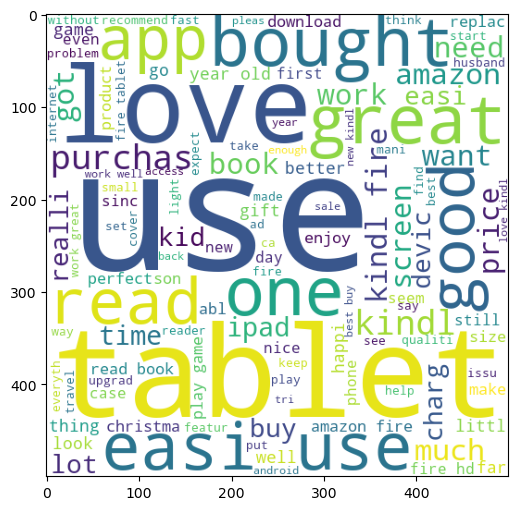

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc) #imshow = display image with axes

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

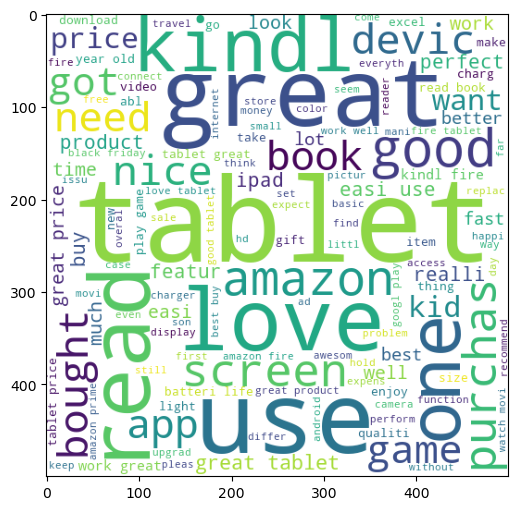

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [48]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,This product so far has not disappointed. My c...,1,143,29,2,product far disappoint children love use like ...
1,great for beginner or experienced person. Boug...,1,75,15,2,great beginn experienc person bought gift love
2,Inexpensive tablet for him to use and learn on...,1,131,30,2,inexpens tablet use learn step nabi thrill lea...
3,I've had my Fire HD 8 two weeks now and I love...,0,593,123,4,fire hd 8 two week love tablet great prime mem...
4,I bought this for my grand daughter when she c...,0,613,124,6,bought grand daughter come visit set user ente...


### 4. Model Building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [50]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [51]:
X.shape

(5002, 3000)

In [52]:
y = df['target'].values


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.3996003996003996
[[160 542]
 [ 59 240]]
0.3069053708439898


In [58]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.3996003996003996
[[160 542]
 [ 59 240]]
0.3069053708439898


In [59]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7032967032967034
[[688  14]
 [283  16]]
0.5333333333333333


In [60]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.6983016983016983
[[589 113]
 [189 110]]
0.49327354260089684


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
!pip install xgboost


In [63]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [64]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [66]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.7402597402597403, 0.5898617511520737)

In [67]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.7402597402597403
Precision -  0.5898617511520737
For  NB
Accuracy -  0.7032967032967034
Precision -  0.5333333333333333
For  DT
Accuracy -  0.7072927072927073
Precision -  0.5111111111111111
For  LR
Accuracy -  0.7522477522477522
Precision -  0.6294416243654822
For  RF
Accuracy -  0.7382617382617382
Precision -  0.6528925619834711
For  AdaBoost
Accuracy -  0.7282717282717283
Precision -  0.5537848605577689
For  ETC
Accuracy -  0.7382617382617382
Precision -  0.6330935251798561
For  GBDT
Accuracy -  0.7402597402597403
Precision -  0.6423357664233577
For  xgb
Accuracy -  0.7332667332667333
Precision -  0.5740740740740741


In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [69]:
performance_df

,Algorithm,Accuracy,Precision
4,RF,0.738262,0.652893
7,GBDT,0.740260,0.642336
6,ETC,0.738262,0.633094
3,LR,0.752248,0.629442
0,SVC,0.740260,0.589862
8,xgb,0.733267,0.574074
5,AdaBoost,0.728272,0.553785
1,NB,0.703297,0.533333
2,DT,0.707293,0.511111


In [70]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [71]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.738262
1,GBDT,Accuracy,0.740260
2,ETC,Accuracy,0.738262
3,LR,Accuracy,0.752248
4,SVC,Accuracy,0.740260
5,xgb,Accuracy,0.733267
6,AdaBoost,Accuracy,0.728272
7,NB,Accuracy,0.703297
8,DT,Accuracy,0.707293
9,RF,Precision,0.652893


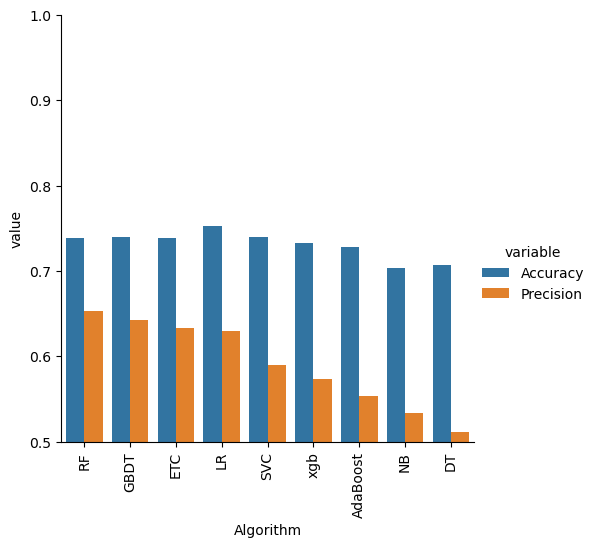

In [72]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improve
#### 1. Change the max_features parameter of TfIdf

In [73]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [75]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [76]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [77]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [78]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.738262,0.652893,0.738262,0.652893,0.738262,0.652893,0.738262,0.652893
1,GBDT,0.740260,0.642336,0.740260,0.642336,0.740260,0.642336,0.740260,0.642336
2,ETC,0.738262,0.633094,0.738262,0.633094,0.738262,0.633094,0.738262,0.633094
3,LR,0.752248,0.629442,0.752248,0.629442,0.752248,0.629442,0.752248,0.629442
4,SVC,0.740260,0.589862,0.740260,0.589862,0.740260,0.589862,0.740260,0.589862
5,xgb,0.733267,0.574074,0.733267,0.574074,0.733267,0.574074,0.733267,0.574074
6,AdaBoost,0.728272,0.553785,0.728272,0.553785,0.728272,0.553785,0.728272,0.553785
7,NB,0.703297,0.533333,0.703297,0.533333,0.703297,0.533333,0.703297,0.533333
8,DT,0.707293,0.511111,0.707293,0.511111,0.707293,0.511111,0.707293,0.511111


In [79]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [80]:
voting = VotingClassifier(estimators=[('rfc', rfc), ('gbdt', gbdt), ('et', etc)],voting='soft')

In [81]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.7512487512487512
Precision 0.7016129032258065


In [83]:
estimators=[('rfc', rfc), ('gbdt', gbdt), ('et', etc)]
final_estimator=RandomForestClassifier()

In [84]:
from sklearn.ensemble import StackingClassifier

In [85]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [89]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.6973026973026973
Precision 0.49280575539568344


In [90]:
lr = LogisticRegression(solver='liblinear', penalty='l1')

In [93]:
lr.fit(X_train, y_train)
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(lr,open('model.pkl','wb'))